In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [3]:
%matplotlib inline

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

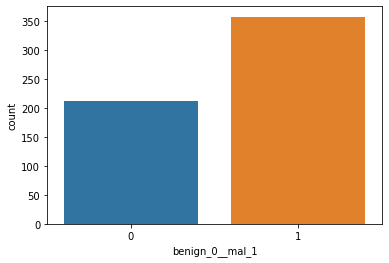

In [5]:
sns.countplot(data=df, x='benign_0__mal_1')

<AxesSubplot:>

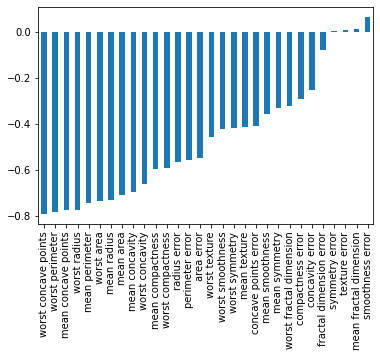

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [12]:
X_train.shape

(426, 30)

In [14]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 6.0708 - val_loss: 1.9452
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6798 - val_loss: 0.5480
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3600 - val_loss: 0.3084
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2875 - val_loss: 0.2723
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2541 - val_loss: 0.2585
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2600 - val_loss: 0.2450
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2400 - val_loss: 0.2459
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2363 - val_loss: 0.2179
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2261 - val_loss: 0.2890
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2357 - val_loss: 0.2111
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1465 - val_loss: 0.1658
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1591 - val_loss: 0.1413
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1583 - val_loss: 0.1539
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1493 - val_loss: 0.1525
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1788 - val_loss: 0.1516
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1791 - val_loss: 0.1588
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1995 - val_loss: 0.1726
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1482 - val_loss: 0.1718
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1670 - val_loss: 0.1546
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1762 - val_loss: 0.1447


14/14 [==============================] - 0s 3ms/step - loss: 0.1200 - val_loss: 0.1776
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2174 - val_loss: 0.1542
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2821 - val_loss: 0.1412
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1265 - val_loss: 0.2340
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1156
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1466 - val_loss: 0.1243
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1225 - val_loss: 0.1176
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1178 - val_loss: 0.1850
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1140 - val_loss: 0.1823
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1806 - val_loss: 0.1436
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1700 - val_loss: 0.2846
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1596 - val_loss: 0.1773
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1624 - val_loss: 0.1717
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0877 - val_loss: 0.1287
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0873 - val_loss: 0.1391
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.1216
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0875 - val_loss: 0.1469
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0923 - val_loss: 0.1242
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1046 - val_loss: 0.1298
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0975 - val_loss: 0.1204
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1268 - val_loss: 0.1572
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1233 - val_loss: 0.1270
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1054 - val_loss: 0.1272
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0954 - val_loss: 0.1163
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1232 - val_loss: 0.1233
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1270 - val_loss: 0.1155
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1009 - val_loss: 0.1437
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1271 - val_loss: 0.1756
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1173 - val_loss: 0.1630
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1274 - val_loss: 0.1226
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0936 - val_loss: 0.1358
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0749 - val_loss: 0.1124
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0813 - val_loss: 0.1062
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.1090
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0832 - val_loss: 0.1434
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1137 - val_loss: 0.1470
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 0.1632
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1382 - val_loss: 0.1075
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0892 - val_loss: 0.1212
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0798 - val_loss: 0.1294
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1395 - val_loss: 0.1692
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1064 - val_loss: 0.1189
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0719 - val_loss: 0.2246
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0922 - val_loss: 0.1217
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0736 - val_loss: 0.1385
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0662 - val_loss: 0.1531
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0789 - val_loss: 0.1154
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0788 - val_loss: 0.1299
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0838 - val_loss: 0.1199
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0639 - val_loss: 0.1505
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.2115 - val_loss: 0.1240
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1229 - val_loss: 0.1549
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1090 - val_loss: 0.2083
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1547 - val_loss: 0.1173
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0997 - val_loss: 0.1123
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0649 - val_loss: 0.1292
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0624 - val_loss: 0.1797
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0663 - val_loss: 0.1724
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0839 - val_loss: 0.1362
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 0.2163
Epoc

In [17]:
losses = pd.DataFrame(model.history.history)

(0.0, 600.0, 0.0, 0.6)

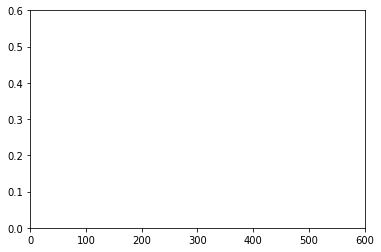

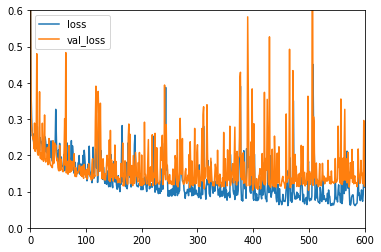

In [35]:
plt.axis([0, 600, 0, 0.6])
losses.plot().axis([0, 600, 0, 0.6])

In [36]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 | 

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [40]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 6.2017 - val_loss: 3.9328
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 1.9860 - val_loss: 0.7129
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4006 - val_loss: 0.3080
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2726 - val_loss: 0.2482
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2235 - val_loss: 0.3150
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2437 - val_loss: 0.2445
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2418 - val_loss: 0.2316
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2702 - val_loss: 0.2555
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2900 - val_loss: 0.2253
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2125 - val_loss: 0.2267
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.2874 - val_loss: 0.4377
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2819 - val_loss: 0.1692
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1708 - val_loss: 0.1671
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2159 - val_loss: 0.1846
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2910 - val_loss: 0.1907
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1897 - val_loss: 0.1998
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1787
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1825 - val_loss: 0.1614
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1818 - val_loss: 0.1938
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3518 - val_loss: 0.2346
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.1421 - val_loss: 0.4273
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1777 - val_loss: 0.1319
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1449 - val_loss: 0.1859
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.1549
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1435 - val_loss: 0.1969
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1578 - val_loss: 0.1820
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1699 - val_loss: 0.2329
Epoch 171/600
14/14 [==============================] - ETA: 0s - loss: 0.138 - 0s 3ms/step - loss: 0.1346 - val_loss: 0.1924
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1737 - val_loss: 0.2393
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1690

(0.0, 300.0, 0.0, 0.6)

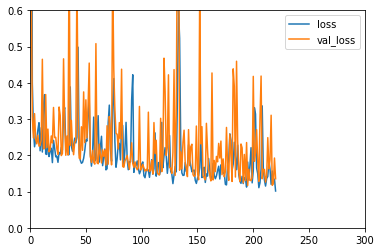

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot().axis([0, 300, 0, 0.6])

In [44]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 76.7225 - val_loss: 26.2370
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 47.7580 - val_loss: 21.0532
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 38.2913 - val_loss: 17.5953
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 39.8028 - val_loss: 10.2670
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 28.4478 - val_loss: 4.0618
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 22.2915 - val_loss: 2.1532
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 18.1602 - val_loss: 1.5338
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 14.0494 - val_loss: 0.8323
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 14.5180 - val_loss: 0.4606
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 11.4713 - val_loss: 0

<AxesSubplot:>

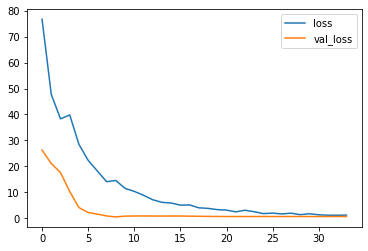

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [49]:
pred =model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.92      0.98      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [52]:
print(confusion_matrix(y_test,pred))

[[48  7]
 [ 2 86]]
